In [3]:
# import packages
from pymsaviz import MsaViz
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
### --- Figure 3C: Alignment --- ###

In [2]:
msa_file = "/Users/isabellalin/Library/CloudStorage/Box-Box/Feaga Lab/Cassidy Prince/Bella/Bioinformatics for Paper/percent identity/spo0B_domain-containing_clustalo.fasta"
mv = MsaViz(msa_file, wrap_length = 70, show_count=True, color_scheme = "Identity")
mv.set_plot_params(ticks_interval = None)

# Add annotations to residues that interact with Spo0F or Spo0A
# B. sub His 30 = position 79
mv.add_markers([79], color="red", marker="*")
# the other resiudes that interact in the alpha1 helix region
mv.add_markers([76, 82, 83, 85, 86, 87, 89, 90, 91, 93, 94, 96], color="orange", marker="*")

# Add text annotation
mv.add_text_annotation((9, 24), "transmembrane region", text_color="green", range_color="green")
mv.add_text_annotation((29, 46), "transmembrane region", text_color="green", range_color="green")

mv.savefig("/Users/isabellalin/Library/CloudStorage/Box-Box/Feaga Lab/Cassidy Prince/Bella/Bioinformatics for Paper/percent identity/alignment_clustal.svg")

In [ ]:
### --- Figure S2: Pie chart --- ###
### Adapted from https://github.com/sanger-pathogens/Roary, roary_plots.ipynb

In [4]:
# Load in gene matrix
gene_df = pd.read_excel('/Users/isabellalin/Library/CloudStorage/Box-Box/Feaga Lab/Cassidy Prince/Bella/Bioinformatics for Paper/BLASTp/blastp_paeni_gene_matrix.xlsx')
gene_df.set_index('Unnamed: 0', inplace=True)
gene_df = gene_df.T

Unnamed: 0,GCF_000023585.1,GCF_000024685.1,GCF_000146875.3,GCF_000159955.1,GCF_000164985.3,GCF_000179615.1,GCF_000187665.3,GCF_000204455.1,GCF_000213315.1,GCF_000214295.1,...,GCF_965137145.1,GCF_965137565.1,GCF_965137855.1,GCF_965139265.1,GCF_965139925.1,GCF_965139955.1,GCF_965139965.1,GCF_965139975.1,GCF_965139985.1,GCF_965140015.1
adhB,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ald,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alr,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
araR,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
asd,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yycE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yycN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
yycO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yycP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

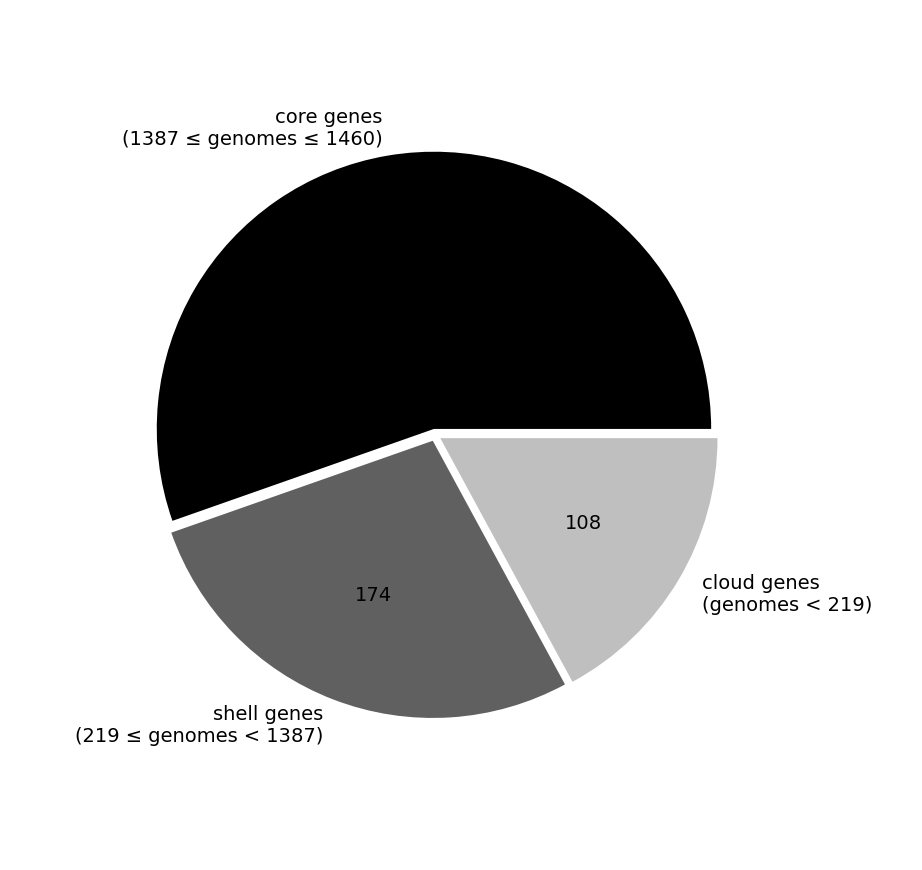

In [5]:
# Core genes: x ≥ 95% of the genomes
# Shell genes: 15 ≤ x < 95% of the genomes
# Cloud genes: x < 15% of the genomes

# Plot the pangenome pie chart

plt.figure(figsize=(10, 10))

core = gene_df[gene_df.sum(axis=1) == gene_df.shape[1]].shape[0] + gene_df[(gene_df.sum(axis=1) < gene_df.shape[1]) &
                 (gene_df.sum(axis=1) >= gene_df.shape[1]*0.95)].shape[0]
shell = gene_df[(gene_df.sum(axis=1) < gene_df.shape[1]*0.95) &
                 (gene_df.sum(axis=1) >= gene_df.shape[1]*0.15)].shape[0]
cloud = gene_df[gene_df.sum(axis=1) < gene_df.shape[1]*0.15].shape[0]

total = gene_df.shape[0]

def my_autopct(pct):
    val = round(pct*total/100.0)
    return '{v:d}'.format(v=val)

plt.pie([core, shell, cloud],
      labels=['core genes\n(%d ≤ genomes ≤ %d)'%(gene_df.shape[1]*.95, gene_df.shape[1]),
              'shell genes\n(%d ≤ genomes < %d)'%(gene_df.shape[1]*.15, gene_df.shape[1]*.95),
              'cloud genes\n(genomes < %d)'%(gene_df.shape[1]*.15)],
      explode=[0.02, 0.02, 0.02], radius=0.9,
      colors=['#000000', '#606060', '#BFBFBF'],
      autopct=my_autopct,
      textprops={'fontsize': 14})

plt.savefig('/Users/isabellalin/Library/CloudStorage/Box-Box/Feaga Lab/Cassidy Prince/Bella/Bioinformatics for Paper/BLASTp/pangenome_pie_chart.png', dpi=300, bbox_inches='tight')